## Deep Neural Network (DNN) Classifier - Iris
We will build a relataively simple neuran net to classify IRIS dataset 

## Step 1 - About IRIS Dataset

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to statistically classify flowers. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and p

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


if IN_COLAB == True:
    from tensorboardcolab import *
    !pip install -U tensorboardcolab
# Load the TensorBoard notebook extension
    %load_ext tensorboard

Running in Google COLAB :  False


## Step 2 : Read Data

In [3]:
data_location = '/data/iris/keras/iris.csv'
# data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"

iris = pd.read_csv(data_location)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3 : Shape Data

### 3.1 - Select columns

In [4]:
input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

print (x.head())
print('-----')
print (y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
-----
       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


### 3.2 - Encode Labels
Our output labels are strings like 'Iris-setosa' and 'Iris-virginica' ..etc.  
These are called **categorical variables**  
We need to change these to numbers  
This is called **encoding**

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/ubuntu/apps/anaconda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.3 - Create train/test split

In [6]:
from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (120, 4)
y_train.shape :  (120,)
x_test.shape :  (30, 4)
y_test.shape :  (30,)


## Step 4 : Build the Model
Since this is a classifier, here is how we are going to build the neural network
- Neurons in Input layer  = input dimensions (4 here)
- Neurons in hidden layer = ???
- Neurons in Output layer = output classes (3 here)
- Output activation is 'softmax'

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:40%"/>

In [7]:
input_dim = len(input_columns)
output_clases = 3 
print ("input_dim : ", input_dim, ", output classes : ", output_clases)

model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=input_dim, activation=tf.nn.relu, input_dim=input_dim, name="input_layer"),
            tf.keras.layers.Dense(units=64, activation=tf.nn.relu, name="hidden_1"),
            tf.keras.layers.Dense(units=output_clases,  activation=tf.nn.softmax, name="output_layer")
            ])

# loss = 'sparse_categorical_crossentropy'  or 'categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(), # or 'adam', 
                 metrics=['accuracy'])

print (model.summary())

input_dim :  4 , output classes :  3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_1 (Dense)             (None, 64)                320       
_________________________________________________________________
output_layer (Dense)         (None, 3)                 195       
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________
None


## Step 5 : Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'classification-iris-1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)


Saving TB logs to :  /tmp/tensorboard-logs/classification-iris-1/2019-09-08--07-53-19


## Step 6 : Train

In [9]:
%%time

## TODO configure some of these
epochs = 100  ## experiment 100, 500, 1000

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1,
              callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 0s 824us/sample - loss: 1.0977 - accuracy: 0.3854 - val_loss: 1.2253 - val_accuracy: 0.2917
Epoch 2/100
96/96 [==============================] - 0s 62us/sample - loss: 1.0525 - accuracy: 0.3854 - val_loss: 1.1546 - val_accuracy: 0.2917
Epoch 3/100
96/96 [==============================] - 0s 60us/sample - loss: 1.0284 - accuracy: 0.3854 - val_loss: 1.0937 - val_accuracy: 0.2917
Epoch 4/100
96/96 [==============================] - 0s 72us/sample - loss: 1.0038 - accuracy: 0.3854 - val_loss: 1.0505 - val_accuracy: 0.2917
Epoch 5/100
96/96 [==============================] - 0s 73us/sample - loss: 0.9884 - accuracy: 0.3854 - val_loss: 1.0224 - val_accuracy: 0.2917
Epoch 6/100
96/96 [==============================] - 0s 62us/sample - loss: 0.9785 - accuracy: 0.3854 - val_loss: 1.002

## Step 7 : Plot History

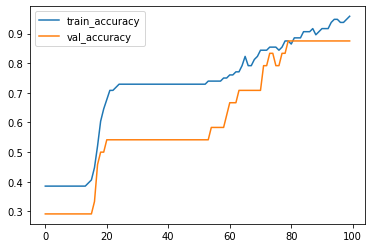

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 : Predict

In [11]:
predictions = model.predict(x_test)
predictions

array([[3.7544317e-04, 1.2249839e-01, 8.7712616e-01],
       [5.4226261e-02, 6.9238710e-01, 2.5338659e-01],
       [9.4420743e-01, 5.0372280e-02, 5.4202653e-03],
       [5.2439648e-04, 2.2950020e-01, 7.6997542e-01],
       [9.4661427e-01, 4.8433285e-02, 4.9524875e-03],
       [9.8948432e-05, 7.6285131e-02, 9.2361593e-01],
       [9.4417459e-01, 5.0398543e-02, 5.4267724e-03],
       [1.3761720e-02, 5.7848042e-01, 4.0775788e-01],
       [1.2976717e-02, 6.0076571e-01, 3.8625759e-01],
       [4.0160775e-02, 6.6970909e-01, 2.9013014e-01],
       [2.0149392e-03, 2.8880620e-01, 7.0917881e-01],
       [1.7311918e-02, 5.7117051e-01, 4.1151753e-01],
       [1.6699363e-02, 5.6132716e-01, 4.2197344e-01],
       [1.2704616e-02, 5.6089050e-01, 4.2640480e-01],
       [1.1554772e-02, 4.9839607e-01, 4.9004909e-01],
       [9.4792467e-01, 4.7369208e-02, 4.7062091e-03],
       [1.2339318e-02, 4.9412838e-01, 4.9353227e-01],
       [1.8452950e-02, 5.1821131e-01, 4.6333575e-01],
       [9.4804132e-01, 4.727

### Understanding Predictions
In the above output, for each test input, the softmax layer, produces 3 numbers.  
These numbers are probabilities.  If you add them up, you will get 1.0  
We want to choose the output that has the highest probability.  

For example `(0.03086184, 0.33362046, 0.6355177)` means  
- class 1 has prob of 0.03  or 3%
- class 2 has prob of 0.33  or 33%
- class 3 has prob of 0.63  or 63%

So we choose the class with highest probability as prediction : class 3


We can get class predictions directly as follows

In [12]:
## Use 'predict_classes' instead of 'predict'
y_pred = model.predict_classes(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

## Step 9 : Evaluate the model

### 9.1 - Print out metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.32
Metric : accuracy = 0.97


### 9.2 - Confussion Matrix
Since this is a classification problem, confusion matrix is very effective way to evaluate our model

In [14]:
## plain confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels = [0,1,2])
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

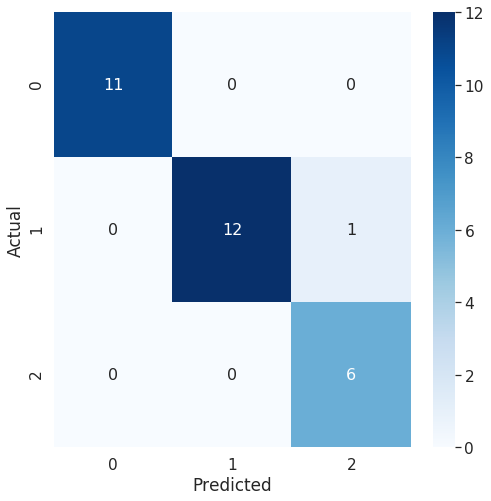

In [15]:
## Let's pretty it up a bit using Seaborn

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,8))

sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=',', annot_kws={"size": 16})# font size
plt.show()

### 9.3 - Metrics calculated from Confusion Matrix

In [16]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(y_test, y_pred, output_dict=True))

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 11},
 '1': {'f1-score': 0.9600000000000001,
       'precision': 1.0,
       'recall': 0.9230769230769231,
       'support': 13},
 '2': {'f1-score': 0.923076923076923,
       'precision': 0.8571428571428571,
       'recall': 1.0,
       'support': 6},
 'accuracy': 0.9666666666666667,
 'macro avg': {'f1-score': 0.9610256410256409,
               'precision': 0.9523809523809524,
               'recall': 0.9743589743589745,
               'support': 30},
 'weighted avg': {'f1-score': 0.9672820512820512,
                  'precision': 0.9714285714285714,
                  'recall': 0.9666666666666667,
                  'support': 30}}


### TODO : Intepret confusion matrix
Instructor will walk you through the matrix.  
Answer these questions
- which class is classified correctly mostly
- which class is classified incorrectly?

## Step 10 : Improve the Model

Inspect the following
- What is the metric 'accuracy' in step 9.1
- And verify this with tensorboard (port 6066)

Most likely, we didn't get a great accuracy.  
How can we improve it?

**Try the following ideas** 

- **Idea-1 : Increase neurons in hidden layer**  
  - In Step-4, increase hidden layer neurons from 8 --> 64  
  - Click 'Kernel --> Restart and Run all Cells'  
  - Hopefully you should see improvement in the accuracy.  
  - Check  accuracy metrics / confusion matrix / tensorboard

## Step 11 : Create a compact version of this notebook
Start another notebook and implement this notebook in the most compact way!